# Visualize the Bulk ATAC-seq

Many times, we want to visualise bigwig files from bulk ATAC-seq, and we usually use Integrative Genomics Viewer (IGV) for this step, while code visualisation in Python, has been lacking at the moment. We will demonstrate the visualisation process in the bulk module of epiverse.

In [1]:
import os
os.environ["EPIONE_DATA_DIR"] = "/Users/fernandozeng/Desktop/analysis/25_epione/code/tutorial/genome"

import epione as epi
import snapatac2 as snap
import scanpy as sc
import matplotlib.pyplot as plt

epi.pl.plot_set(font_path='Arial')

%load_ext autoreload
%autoreload 2

└─ 🔬 Starting plot initialization...
  ├─ Apply Scanpy/matplotlib settings
  ├─ Custom font setup
  └─ Using already downloaded Arial font from: /var/folders/4m/2xw3_2s503s9r616083n7w440000gn/T/omicverse_arial.ttf


2025-09-08 18:08:43 - WARNING - Matplotlib is building the font cache; this may take a moment.
2025-09-08 18:08:50 - INFO - Failed to extract font properties from /System/Library/Fonts/Supplemental/NISC18030.ttf: Could not set the fontsize (invalid pixel size; error code 0x17)
2025-09-08 18:08:50 - INFO - Failed to extract font properties from /System/Library/Fonts/Apple Color Emoji.ttc: Could not set the fontsize (invalid pixel size; error code 0x17)
2025-09-08 18:08:50 - INFO - Failed to extract font properties from /System/Library/Fonts/LastResort.otf: tuple indices must be integers or slices, not str
2025-09-08 18:08:50 - INFO - Failed to extract font properties from /System/Library/PrivateFrameworks/FontServices.framework/Resources/Reserved/PingFangUI.ttc: Can not load face (locations (loca) table missing; error code 0x90)


  └─ Registered as: Arial
  ├─ Suppress warnings
  ├─ 
___________      .__                      
\_   _____/_____ |__| ____   ____   ____  
 |    __)_\____ \|  |/  _ \ /    \_/ __ \ 
 |        \  |_> >  (  <_> )   |  \  ___/ 
/_______  /   __/|__|\____/|___|  /\___  >
        \/|__|                  \/     \/ 

  ├─ 🔖 Version: 0.0.1rc1   📚 Tutorials: https://epione.readthedocs.io/
└─ ✅ plot_set complete.



Here, we use the bigwig data from [Widespread enhancer dememorization and promoter priming during parental-to-zygotic transition](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE114954)

In [2]:
#!wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3359nnn/GSM3359495/suppl/GSM3359495_oocyte_H3K4me1_rep1.bw
#!wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3359nnn/GSM3359496/suppl/GSM3359496_oocyte_H3K4me1_rep2.bw

## Construct the bigwig object

We first prepare a directory of bigwig files that we need to visualise. epiverse supports visualising multiple files at the same time, but of course you can also visualise just one file.
We provide the directory in dictionary format.

In [2]:
bw_dict={
    'oocyte_H3K4me1_rep1':'data/GSM3359495_oocyte_H3K4me1_rep1.bw',
    'oocyte_H3K4me1_rep2':'data/GSM3359496_oocyte_H3K4me1_rep2.bw'
}
bw_obj=epi.bulk.bigwig(bw_dict)
bw_obj.read()

└─ Load bigWig files
  ├─ Loading oocyte_H3K4me1_rep1...
  └─ Loading oocyte_H3K4me1_rep2...


## Read the gene annotation

(nonecessary) When we visualise chromosomal regions, we usually want to see genetic information as well. This is where we can provide gtf files as input.

In [3]:
bw_obj.load_gtf('genome/danRer7.refGene.gtf.gz')

└─ Load GTF file
  ├─ Reading GTF...
  └─ GTF loaded


## Plot track

### plot obtional

If you wish to specify personalised plot colours, we provide here a few interesting parameters as input to plot_track.

- color_dict: the color of each bigwig
- region_dict: the region we interested
- plot_names: the names of bigwig, if not provided ,it will use the keys of bigwig_dict

In [4]:
color_dict={
    'oocyte_H3K4me1_rep1':epi.pl.green_color[3],
    'oocyte_H3K4me1_rep2':epi.pl.green_color[3]
}
region_dict={
    'region1':[46050000, 46050000+5000],
    'region2':[46056000,46057000]
}

(<Figure size 480x180 with 3 Axes>,
 array([<Axes: ylabel='Rep1'>, <Axes: ylabel='Rep2'>, <Axes: >],
       dtype=object))

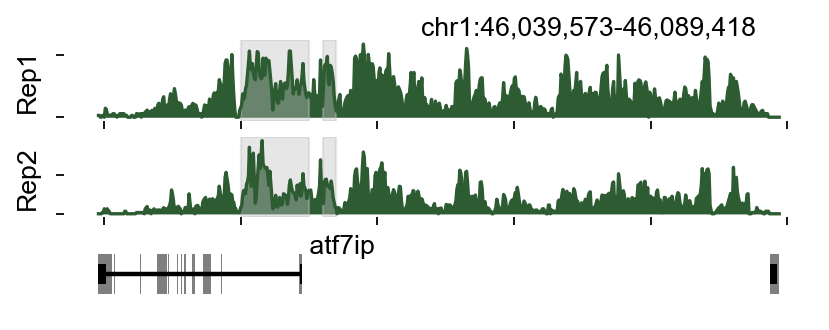

In [5]:
bw_obj.plot_track(chrom='chr1',chromstart=46039573,chromend=46089418,
                  plot_names=['Rep1','Rep2'],figwidth=6,figheight=1.5,
                  color_dict=color_dict,
                  region_dict=region_dict)


## Plot Matrix

### Compute the tss/tes enrichment matrix

Different genes have inconsistent chromatin activity in Chip-seq/ATAC-seq, as evidenced by differences in chromatin signaling before and after the TSS/TES locus, and we can find sample-specific TSS/TES signaling for downstream analysis. Here, we provide the function of `compute_matrix` to get the tss/tes enrichment matrix

In [34]:
bw_obj.compute_matrix('oocyte_H3K4me1_rep1',nbins=100,n_jobs=8)

└─ Compute matrix: oocyte_H3K4me1_rep1
  ├─ Prepare features
  ├─ Build matrices


Chromosomes: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:42<00:00,  1.71s/chr]


  └─ Finalize
  └─ oocyte_H3K4me1_rep1 matrix finished
  └─ oocyte_H3K4me1_rep1 tss matrix in bw_tss_scores_dict[oocyte_H3K4me1_rep1]
  └─ oocyte_H3K4me1_rep1 tes matrix in bw_tes_scores_dict[oocyte_H3K4me1_rep1]
  └─ oocyte_H3K4me1_rep1 body matrix in bw_body_scores_dict[oocyte_H3K4me1_rep1]


(AnnData object with n_obs × n_vars = 15247 × 100
     obs: 'region_start', 'region_end'
     uns: 'range', 'bins',
 AnnData object with n_obs × n_vars = 15247 × 100
     obs: 'region_start', 'region_end'
     uns: 'range', 'bins',
 AnnData object with n_obs × n_vars = 15247 × 100
     obs: 'region_start', 'region_end'
     uns: 'range', 'bins')

The tss result will be stored in `bw_tss_scores_dict['oocyte_H3K4me1_rep1']`, and tes stored in `bw_tes_scores_dict['oocyte_H3K4me1_rep1']`. The obs represent the genes 

In [29]:
bw_obj.bw_tss_scores_dict['oocyte_H3K4me1_rep1']

AnnData object with n_obs × n_vars = 15247 × 100
    obs: 'region_start', 'region_end'
    uns: 'range', 'bins'

After compute the tss/tes enrichment matrix, we can use `save/load` to save/load the result.

In [30]:
bw_obj.save_bw_result('result')

  └─ Saving oocyte_H3K4me1_rep1 results...


In [6]:
bw_obj.load_bw_result('result')

└─ Load computed matrices
  ├─ Loading oocyte_H3K4me1_rep1 results...
  └─ Loading oocyte_H3K4me1_rep2 results...
    └─ ⚠️  You need to run the compute_matrix function first for oocyte_H3K4me1_rep2!
    └─ ⚠️  You need to run the compute_matrix function first for oocyte_H3K4me1_rep2!
    └─ ⚠️  You need to run the compute_matrix function first for oocyte_H3K4me1_rep2!


### Plot the tss/tes enrichment matrix

Here, we provide `plot_matrix` and `plot_matrix_line` to visualize the signal of tss/tes enrichment

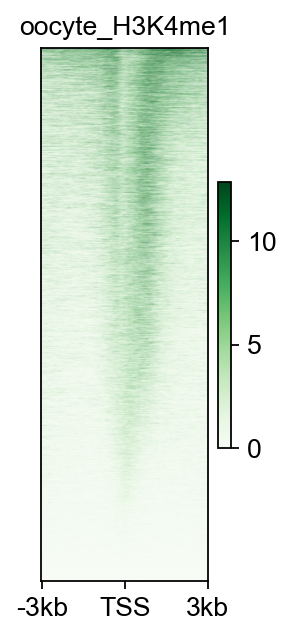

In [7]:
fig,ax=bw_obj.plot_matrix(bw_name='oocyte_H3K4me1_rep1',bw_type='TSS',
                    figsize=(2,4),cmap='Greens',
                    vmax='auto',vmin='auto',
                   fontsize=12,title='oocyte_H3K4me1')
#fig.savefig('data/oocyte_H3K4me1_rep1.png',dpi=300,bbox_inches='tight')

(<Figure size 240x240 with 1 Axes>,
 <Axes: title={'center': 'oocyte_H3K4me1_rep1'}>)

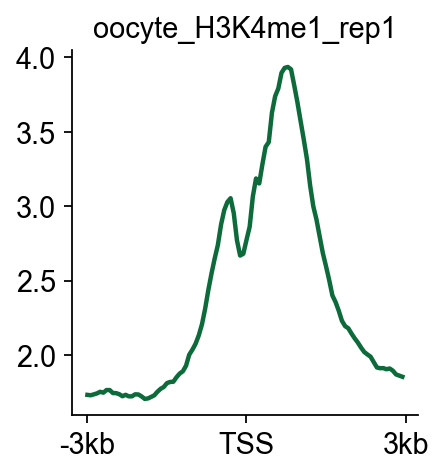

In [8]:
bw_obj.plot_matrix_line(bw_name='oocyte_H3K4me1_rep1',bw_type='TSS',
                    figsize=(3,3),color='#0d6a3b')

(<Figure size 160x320 with 2 Axes>, <Axes: title={'center': 'oocyte_H3K4me1'}>)

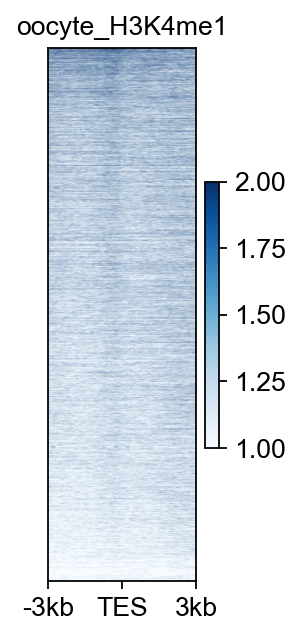

In [9]:
bw_obj.plot_matrix(bw_name='oocyte_H3K4me1_rep1',bw_type='TES',
                    figsize=(2,4),cmap='Blues',
                    vmax=2,vmin=1,
                   fontsize=12,title='oocyte_H3K4me1')

(<Figure size 240x240 with 1 Axes>,
 <Axes: title={'center': 'oocyte_H3K4me1_rep1'}>)

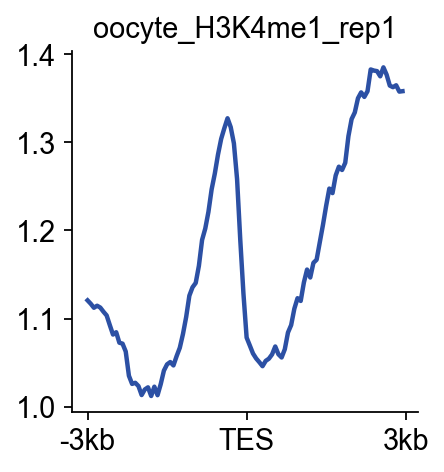

In [10]:
bw_obj.plot_matrix_line(bw_name='oocyte_H3K4me1_rep1',bw_type='TES',
                    figsize=(3,3),color='#2c50a4')

(<Figure size 200x320 with 2 Axes>, <Axes: title={'center': 'oocyte_H3K4me1'}>)

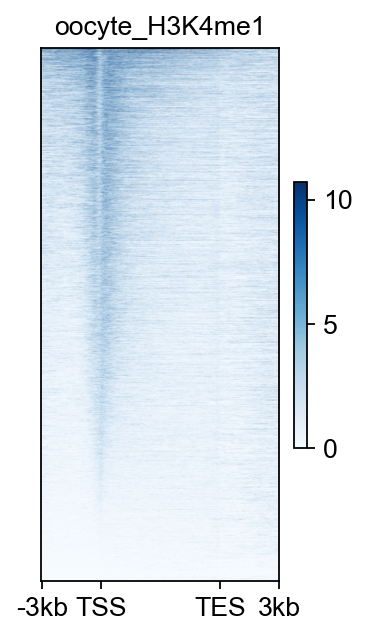

In [11]:
bw_obj.plot_matrix(bw_name='oocyte_H3K4me1_rep1',bw_type='all',
                    figsize=(2.5,4),cmap='Blues',
                    vmax='auto',vmin='auto',
                   fontsize=12,title='oocyte_H3K4me1')

(<Figure size 240x240 with 1 Axes>,
 <Axes: title={'center': 'oocyte_H3K4me1_rep1'}>)

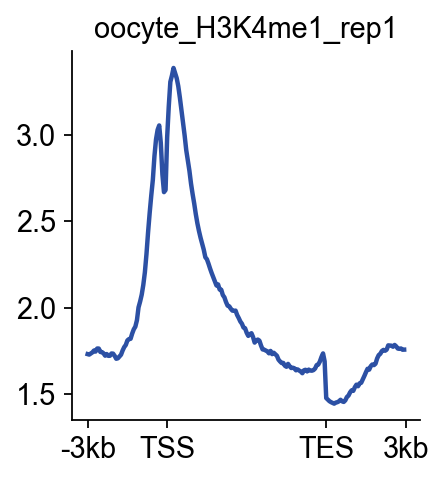

In [12]:
bw_obj.plot_matrix_line(bw_name='oocyte_H3K4me1_rep1',bw_type='all',
                    figsize=(3,3),color='#2c50a4')

## Plot the correlation between bigwig

In addition to exploring the properties of the bigwig itself, sometimes we need to calculate the correlation between different bigwigs.

We set the size of each bin to 10000, i.e., the size of the region on the chromosome, and calculate the average chromosome signal value for each bin. and store it in the `scoreperbindata`

In [24]:
scoreperbindata=bw_obj.getscoreperbin(bin_size=10000,
                      number_thread=4,)

In [25]:
scoreperbindata.loc[scoreperbindata['chrom']=='chr24'].head()

,chrom,start,end,oocyte_H3K4me1_rep1,oocyte_H3K4me1_rep2
0,chr3,0,10000,1.770164,1.753709
1,chr3,10000,20000,2.109507,2.927132
2,chr3,20000,30000,1.434286,1.380496
3,chr3,30000,40000,3.839915,4.624632
4,chr3,40000,50000,1.267515,1.237158


In [7]:
scoreperbindata.head()

,chrom,start,end,oocyte_H3K4me1_rep1,oocyte_H3K4me1_rep2
0,chr24,0,10000,1.075000,1.244246
1,chr24,10000,20000,1.860320,2.034103
2,chr24,20000,30000,1.771524,1.696709
3,chr24,30000,40000,1.186645,1.600000
4,chr24,40000,50000,2.283304,2.912770


We provide a nice visualization function to compare the correlation of two bigwigs, and for the purpose of visualization parameter tuning, we separate the value of the correlation from the visualization step to reduce the time spent repeating the computation when tuning the visualization parameters

In [26]:
bw_obj.compute_correlation(bw_names=['oocyte_H3K4me1_rep1','oocyte_H3K4me1_rep2'])

└─ The correlation between oocyte_H3K4me1_rep1 and oocyte_H3K4me1_rep2 is 0.93
  └─ Now you can use plot_correlation() to plot the correlation scatter plot


0.930985887843024

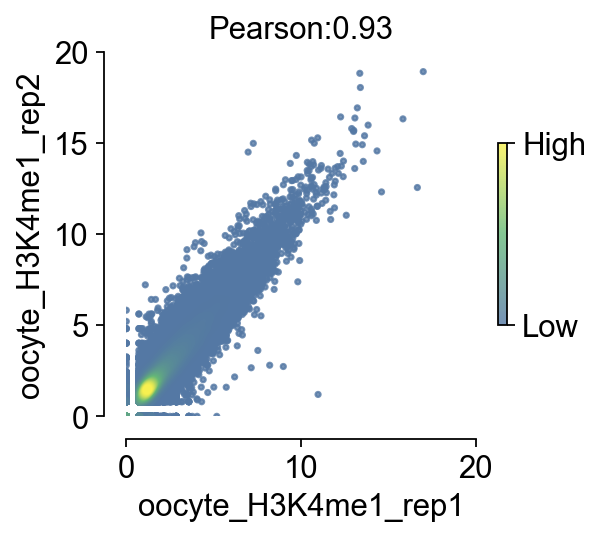

In [27]:
fig,ax=bw_obj.plot_correlation_bigwig(figsize=(3.5,3),
                                scatter_size=5,scatter_alpha=0.8,
                                fontsize=14)
#fig.savefig('data/correlation_bigwig.png',dpi=300,bbox_inches='tight')